## importing nescessary libraries

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

## Reading image as numpy array

### To read any image, we use the method cv2.imread() and specify the complete path of the image which gets imported into the notebook as a Numpy array. We can then plot it using the pyplot’s method imshow().

The type of this input is <class 'numpy.ndarray'>
Shape: (408, 612, 3)


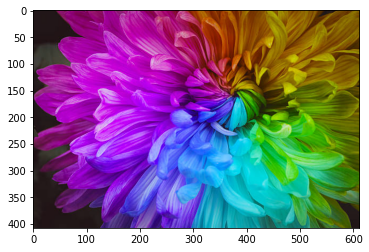

In [3]:
image = cv2.imread('flower.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

### by default, OpenCV reads image in the sequence Blue Green Red (BGR). Thus, to view the actual image we need to convert the rendering to Red Green Blue (RGB).

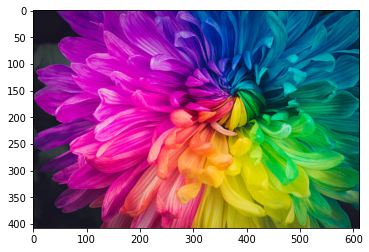

In [6]:
# The method cvtColor allows us to convert the image rendering to a different color space.
# To move from BGR color space to RGB, we use the method cv2.COLOR_BGR2RGB.
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

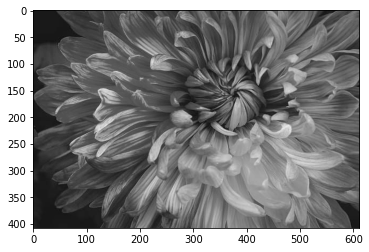

In [7]:
# we might want to have black and white images. In such cases, we can express images as Gray. 
# We now use the conversion space as cv2.COLOR_BGR2GRAY and show the output with the colormap as gray.
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

## Resizing the image

### We can also resize the image to a given dimension. We use the method resize provided by cv2. The first argument is the image we want to resize, and the second argument is the width and height defined within parentheses.

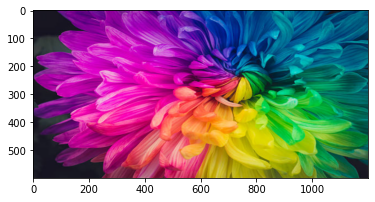

In [8]:
## make it larger
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

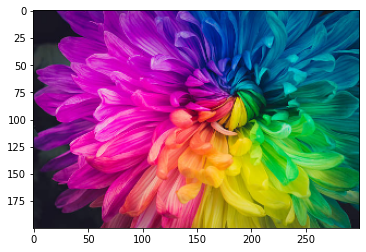

In [9]:
## make it smaller
resized_image = cv2.resize(image, (300, 200))
plt.imshow(resized_image)

# Color Identification

## RGB to Hex Conversion
### We’d first define a function that will convert RGB to hex so that we can use them as labels for our pie chart.

In [12]:
# On reading the color which is in RGB space, we return a string.
# {:02x} simply displays the hex value for the respective color.
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

## Read image in RGB color space
# Next, we define a method that will help us get an image into Python in the RGB space.

In [13]:
# We supply the path of the image as the argument . 
# First, we read the file using imread and then change its color space before returning it.
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

## Get colors from an image
# We now define the complete code as a method that we can call to extract the top colors from the image and display them as a pie chart. I’ve named the method as get_colors and it takes 3 arguments:
    1. image: The image whose colors we wish to extract.
    2. number_of_colors: Total colors we want to extract.
    3. show_chart: A boolean that decides whether we show the pie chart or not.

In [15]:
def get_colors(image, number_of_colors, show_chart):
    """
        First, we resize the image to the size 600 x 400. It is not required to resize it to a smaller size
        but we do so to lessen the pixels which’ll reduce the time needed to extract the colors from the image.
        KMeans expects the input to be of two dimensions, so we use Numpy’s reshape function to reshape the image data.
    """
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    
    """
        KMeans algorithm creates clusters based on the supplied count of clusters. In our case,
        it will form clusters of colors and these clusters will be our top colors.
        We then fit and predict on the same image to extract the prediction into the variable labels.
    """
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    """
        We use Counter to get count of all labels. To find the colors, we use clf.cluster_centers_. 
        The ordered_colors iterates over the keys present in count, and then divides each value by 255.
        We could have directly divided each value by 255 but that would have disrupted the order.
    """
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

## now let's call the method, and test the output

C:\Users\amrmo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[array([  3.63135267,  96.72452099, 141.62802257]),
 array([230.87193964,  90.0884867 ,  89.89035458]),
 array([145.30865477,  17.17466843, 160.755264  ]),
 array([100.14442822, 179.58424263,  57.01735544]),
 array([21.68522531, 39.85350919, 51.20731669]),
 array([203.21302169, 181.04263566,  22.10527758]),
 array([231.47193137, 102.10531649, 193.59596028]),
 array([ 10.03483983, 148.19631278,  70.32754282]),
 array([113.08142438,  15.85929866,  94.62615351]),
 array([217.02697283,  11.52200943, 169.84839065])]

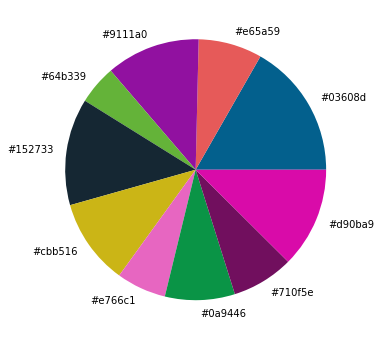

In [16]:
get_colors(get_image('flower.jpg'), 10, True)

C:\Users\amrmo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[array([100.1431839 ,  38.6344115 ,  62.75515311]),
 array([198.3752346 , 161.72087643,  69.54148662]),
 array([ 43.59253709, 119.43728458, 178.37174684]),
 array([ 18.96529444,  61.4333746 , 118.47202662]),
 array([161.88617982,  73.26002176, 112.24546337]),
 array([129.52272542, 113.20277755,  24.02626863]),
 array([33.5281633 , 18.82384486, 28.3207198 ]),
 array([200.75922476, 161.40943764, 164.00824907])]

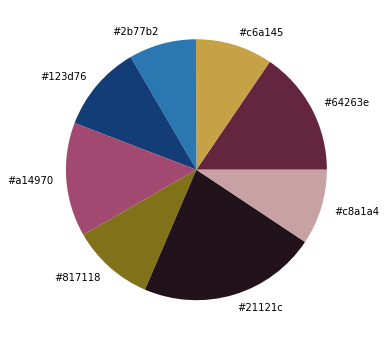

In [17]:
get_colors(get_image('human.jpg'), 8, True)

C:\Users\amrmo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[array([27.08231958, 99.89728345, 93.94539468]),
 array([154.79988069, 218.32132079, 250.5171591 ]),
 array([246.7286542 , 196.96774899,  18.46129879]),
 array([168.64805472, 123.59786233,  73.00701154]),
 array([ 54.94264618, 145.74806086, 174.68295048]),
 array([237.5151456 , 205.90810204, 149.13877372]),
 array([116.16599708, 129.68158023, 122.67184076]),
 array([121.80179865, 185.64591556, 249.18965776]),
 array([106.79515505,  82.21376154,  41.00118362]),
 array([235.33603551,  82.72540694,  43.01068005]),
 array([179.48232695, 171.43399384, 154.4666622 ]),
 array([236.71965424, 233.43989451, 223.27748883]),
 array([ 16.55278396, 204.43429844, 109.44365256]),
 array([217.98312273,  33.26233339,  12.33944954]),
 array([37.236445  , 46.21979394, 29.91112499])]

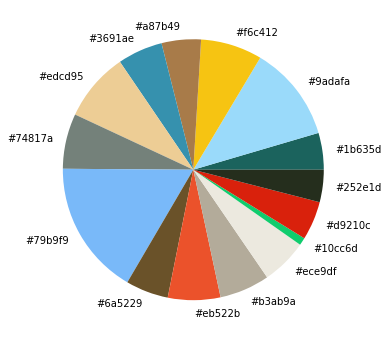

In [19]:
get_colors(get_image('environment.jfif'), 15, True)